In [1]:
import galprime as gp

import numpy as np

from astropy.modeling.models import Sersic2D

from astropy.convolution import convolve
from astropy.visualization import ZScaleInterval
from astropy.stats import SigmaClip

from photutils import segmentation, background

from matplotlib import pyplot as plt

gp.dump_default_config_file("default.gprime")
config = gp.read_config_file("default.gprime")

In [2]:
i_cutouts = gp.Cutouts.from_file("../pdata/cutouts_i.fits")


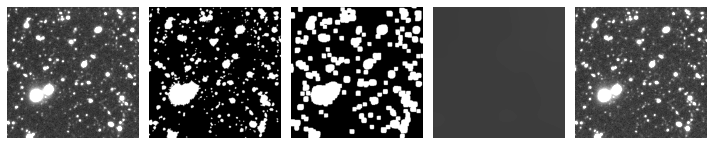

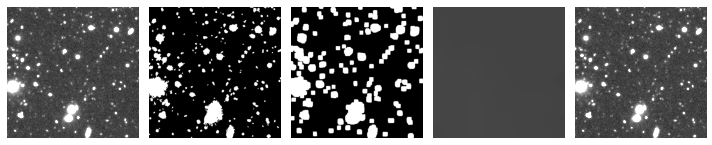

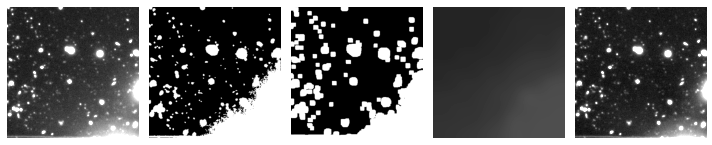

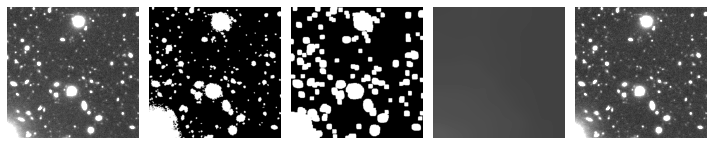

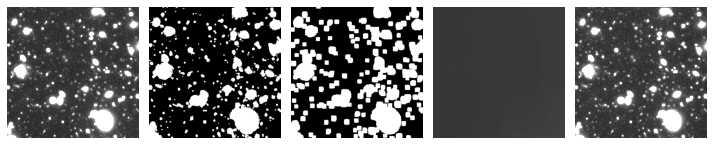

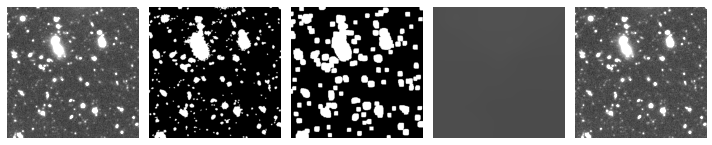

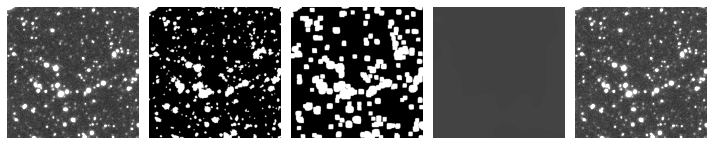

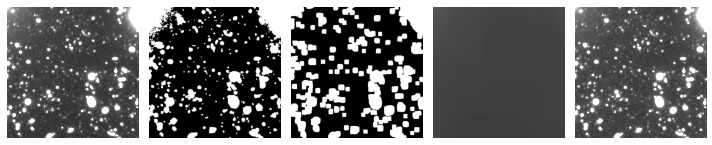

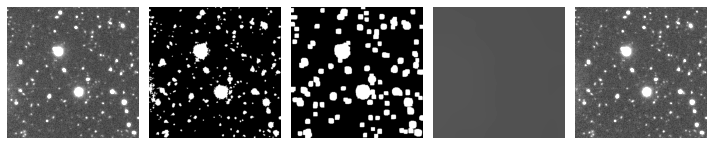

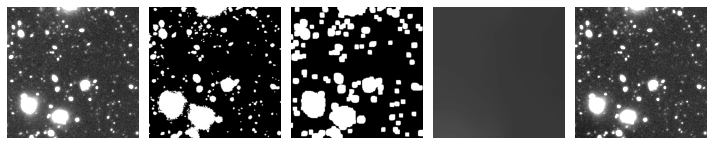

In [5]:
for cutout in i_cutouts.cutouts[:10]:
    bg_source_mask, bg = gp.estimate_background_2D(cutout, config)
    vmin, vmax = ZScaleInterval().get_limits(cutout)

    #bg = gp.estimate_background_2D(cutout, config)

    source_mask, mask_data = gp.gen_mask(cutout, config)

    fig, ax = plt.subplots(1, 5, figsize=(10, 4), facecolor="white")

    ax[0].imshow(cutout, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)
    ax[1].imshow(source_mask, origin="lower", cmap="gray")
    ax[2].imshow(bg_source_mask, origin="lower", cmap="gray")
    ax[3].imshow(bg.background, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)
    ax[4].imshow(cutout - bg.background, origin="lower", cmap="gray", vmin=vmin, vmax=vmax)
    for axis in ax:
        axis.axis("off")
    plt.tight_layout()
    plt.show()
